<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/hw11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt


al = 1
dx = .2 #space mesh size
rho = 1. #conditinal number, to be less than .5 for the stability
dt = rho*(dx**2)/al #time step size

def init_f(x):
  return np.sin(np.pi*x)

def true_f(x,t):
  return np.exp(-np.pi**2 * t)*np.sin(np.pi * x)

def error_fcn(a,b,nt,dx,dt,sol):
  nx = int((b-a)/dx)
  e = np.zeros((nt,nx))
  
  for t in range(nt):
    for x in range(nx):
      e[t][x] = np.abs(sol[t][x]-true_f(a+x*dx,t*dt))
  return e

def btcs(a, b, nt, dx, dt, rho):
  nx = int((b-a)/dx)
  u = np.zeros((nt,nx))
  
  ld = np.repeat(-rho,nx-1)#lower diag
  md = np.repeat(1+2*rho,nx)#main diag
  ud = np.repeat(-rho,nx-1)#upper diag
  
  A = np.diag(ld, -1) + np.diag(md, 0) + np.diag(ud, 1)#matrix
  
  for x in range(0,nx):
    u[0][x] = init_f(a+x*dx)
  
  for t in range(0,nt-1):
    u[t+1][:] = np.linalg.inv(A).dot(u[t][:])
  
  return u

btcs_sol = btcs(0,1,200,dx,dt,rho)

err = error_fcn(0, 1, 200, dx, dt, btcs_sol)
superr = np.max(err)
print('the supnorm of error function is %f'%superr)



the supnorm of error function is 0.190161


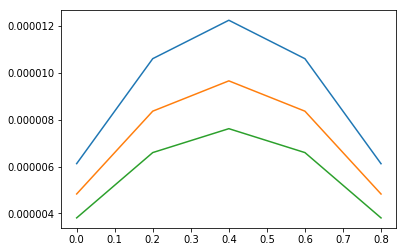

In [12]:
xx = np.arange(0,1,.2)
error1 = np.zeros(5)
for i in range(len(error1)):
  error1[i] = true_f(xx[i], 1.92) - btcs_sol[int(1.92/dt)][i]
error2 = np.zeros(5)
for i in range(len(error2)):
  error2[i] = true_f(xx[i], 1.96) - btcs_sol[int(1.96/dt)][i]
error3 = np.zeros(5)
for i in range(len(error3)):
  error3[i] = true_f(xx[i], 2.00) - btcs_sol[int(2.00/dt)][i]
plt.plot(xx,np.abs(error1))
plt.plot(xx,np.abs(error2))
plt.plot(xx,np.abs(error3))
plt.show()